In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import gc

%matplotlib inline

pd.set_option('display.max_columns',43)

In [2]:
train = pd.read_csv('train_patient.csv')
train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,0,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,0,1
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,0,2
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,NaN,7.36,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,0,3
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,0,4


In [3]:
filter_cols = ['Patient_id', 'time', 'HR','O2Sat','BUN', 'Fibrinogen','Hgb','TroponinI','Age', 'MAP', 'Resp', 'Temp', 'WBC', 
               'PaCO2', 'SepsisLabel']

filter_train = train[filter_cols]
filter_train.head(10)

,Patient_id,time,HR,O2Sat,BUN,Fibrinogen,Hgb,TroponinI,Age,MAP,Resp,Temp,WBC,PaCO2,SepsisLabel
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,83.14,NaN,NaN,NaN,NaN,NaN,0
1,0,1,97.0,95.0,NaN,NaN,NaN,NaN,83.14,75.33,19.0,NaN,NaN,NaN,0
2,0,2,89.0,99.0,NaN,NaN,NaN,NaN,83.14,86.00,22.0,NaN,NaN,NaN,0
3,0,3,90.0,95.0,NaN,NaN,NaN,NaN,83.14,NaN,30.0,NaN,NaN,100.0,0
4,0,4,103.0,88.5,NaN,NaN,NaN,NaN,83.14,91.33,24.5,NaN,NaN,NaN,0
5,0,5,110.0,91.0,NaN,NaN,NaN,NaN,83.14,NaN,22.0,NaN,NaN,NaN,0
6,0,6,108.0,92.0,NaN,NaN,NaN,NaN,83.14,77.00,29.0,36.11,NaN,NaN,0
7,0,7,106.0,90.5,NaN,NaN,NaN,NaN,83.14,76.33,29.0,NaN,NaN,NaN,0
8,0,8,104.0,95.0,NaN,NaN,NaN,NaN,83.14,88.33,26.0,NaN,NaN,NaN,0
9,0,9,102.0,91.0,NaN,NaN,NaN,NaN,83.14,87.33,30.0,NaN,NaN,NaN,0


In [4]:
len(filter_train['Patient_id'].unique())

30336

In [5]:
filter_train.isnull().sum()/filter_train.shape[0] * 100

Patient_id      0.000000
time            0.000000
HR              9.140431
O2Sat          12.688083
BUN            92.688117
Fibrinogen     99.300379
Hgb            92.120188
TroponinI      99.322712
Age             0.000000
MAP            11.692988
Resp           13.455048
Temp           66.221360
WBC            93.214374
PaCO2          93.356420
SepsisLabel     0.000000
dtype: float64

In [6]:
sepsis_grp = filter_train.groupby(['Patient_id'])['SepsisLabel'].sum()
len(sepsis_grp[sepsis_grp > 0])

2340

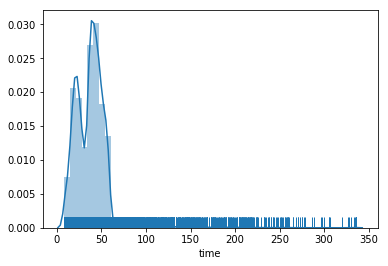

In [7]:
time_spent = filter_train.groupby(['Patient_id'])['time'].count()
# print(time_spent)
sns.distplot(time_spent, bins = 50, rug=True)

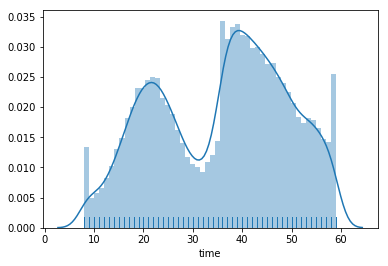

In [8]:
time_spent  = time_spent[time_spent < 60]
sns.distplot(time_spent, bins = 50, rug = True)

In [9]:
temp = filter_train.groupby(['Patient_id'])['SepsisLabel'].count().reset_index()


sel_pid = np.array(temp[temp['SepsisLabel'] < 60]['Patient_id'])

patient_filter_train = filter_train[filter_train['Patient_id'].isin(sel_pid)]
len(patient_filter_train['Patient_id'].unique())

29424

In [10]:
sepsis_patients = patient_filter_train.groupby(['Patient_id'])['SepsisLabel'].sum()
len(sepsis_patients[sepsis_patients > 0])

1525

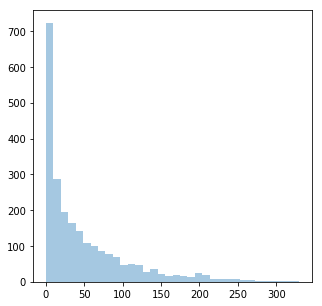

In [11]:
temp = filter_train.groupby(['Patient_id'])['SepsisLabel'].sum().reset_index()

sepsis_train_pid = np.array(temp[temp['SepsisLabel'] > 0]['Patient_id'])

temp_filter = filter_train[filter_train['Patient_id'].isin(sepsis_train_pid)]

sepsis_time = []
tot_time = []

for pid in sepsis_train_pid:
    df = temp_filter[temp_filter['Patient_id']==pid]
    sepsis_time.append(df[df['SepsisLabel']==1]['time'].iloc[0])
    tot_time.append(df[df['SepsisLabel']==1]['time'][::-1].iloc[0])
    
plt.rcParams['figure.figsize'] = 5,5

sns.distplot(sepsis_time, kde=False);

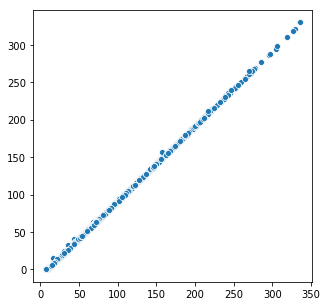

In [12]:
sns.scatterplot(tot_time, sepsis_time)

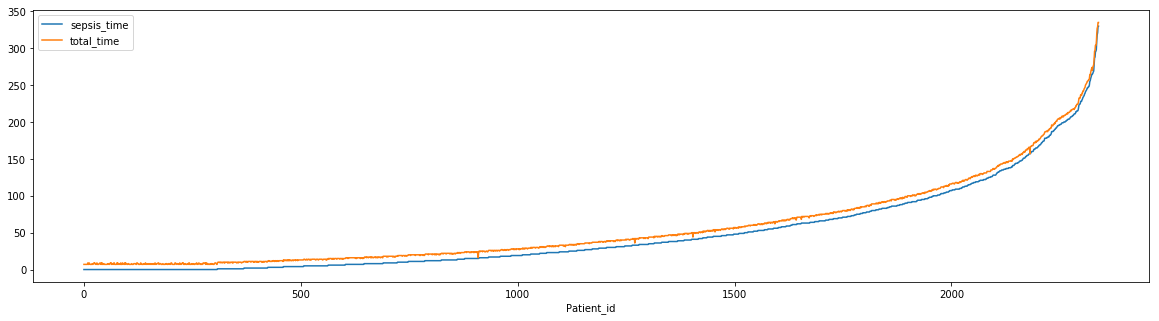

In [13]:
temp = pd.DataFrame()

temp['pid'] = sepsis_train_pid

temp['sepsis_time'] = sepsis_time

temp['tot_time'] = tot_time

temp.sort_values(by=['sepsis_time'], inplace=True)

temp['level'] = temp.reset_index().index

plt.rcParams['figure.figsize'] = 20, 5


plt.plot(temp['level'], temp['sepsis_time'])
plt.plot(temp['level'], temp['tot_time'])
_ = plt.xlabel('Patient_id')
_ = plt.legend(['sepsis_time', 'total_time'])

In [14]:
temp.sort_values(by=['pid'], inplace = True)
temp.shape

(2340, 4)

In [15]:
pids = np.array(filter_train['Patient_id'].unique())

missing_dict = {}
pid_missing_dict = {}


for col in ['HR','O2Sat','BUN', 'Fibrinogen','Hgb','TroponinI','Age', 'MAP', 'Resp', 'Temp', 'WBC','PaCO2']:
    missing_dict[col] = []
    pid_missing_dict[col] = []
    for pid in pids:
        temp = filter_train[filter_train['Patient_id'] == pid]
        missing = (temp[col].isnull().sum() / temp.shape[0]) * 100
        missing_dict[col].append(missing)
        if missing > 99:
            pid_missing_dict[col].append(pid)

In [22]:
len(set.union(set(pid_missing_dict['HR']), 
              set(pid_missing_dict['MAP']), 
              set(pid_missing_dict['O2Sat']),
              set(pid_missing_dict['BUN']),
              set(pid_missing_dict['Fibrinogen']),
              set(pid_missing_dict['Hgb']),
              set(pid_missing_dict['TroponinI']),
              set(pid_missing_dict['Age']),
              set(pid_missing_dict['PaCO2']),
              set(pid_missing_dict['Resp']), 
              set(pid_missing_dict['Temp']), 
              set(pid_missing_dict['WBC'])))

30119

In [26]:
na_pid_union = set.union(set(pid_missing_dict['HR']), 
              set(pid_missing_dict['MAP']), 
              set(pid_missing_dict['O2Sat']),
              set(pid_missing_dict['BUN']),
              set(pid_missing_dict['Fibrinogen']),
              set(pid_missing_dict['Hgb']),
              set(pid_missing_dict['TroponinI']),
              set(pid_missing_dict['Age']),
              set(pid_missing_dict['PaCO2']),
              set(pid_missing_dict['Resp']), 
              set(pid_missing_dict['Temp']), 
              set(pid_missing_dict['WBC']))

In [27]:
len(na_pid_union & set(sepsis_train_pid))

2302

In [28]:
train[~train['Patient_id'].isin(na_pid_union)].to_csv('updated_train.csv', index=False)